In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import json

def plot(plt, ylabel, title):
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel(ylabel)
    plt.xlabel("day of April")
    plt.title(title)
    plt.show()

In [2]:
scores = {}
DAYS = range(10, 27)
for day in DAYS:
    filename = 'json/04-{}.json'.format(day)
    scores[day] = json.load(open(filename))['leaderboard']

In [3]:
teams = []
mins = []
maxs = []
avgs = []
for key, vals in scores.items():
    teams.append(len(vals))
    mins.append(min(val['score'] for val in vals))
    maxs.append(max(val['score'] for val in vals))
    total = sum(val['score'] for val in vals)
    avgs.append(total / len(vals))

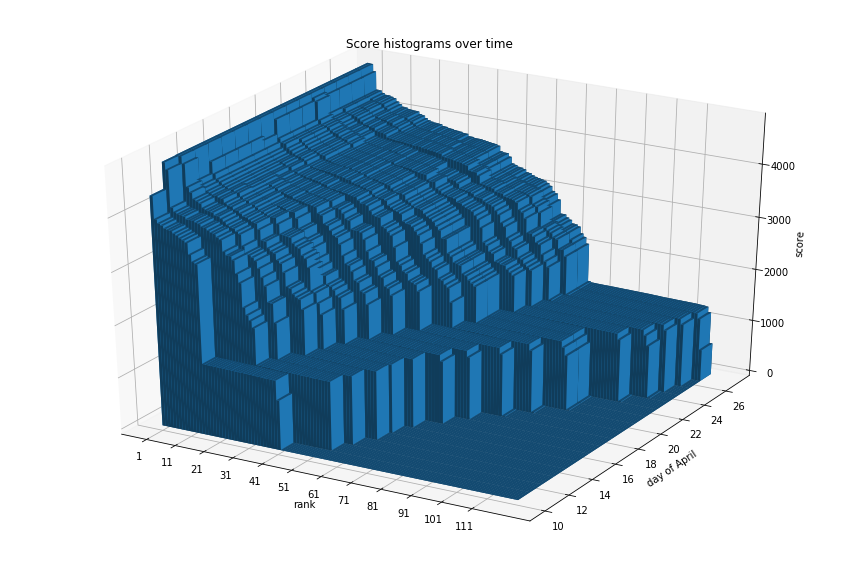

In [4]:
data_2d = []
for vals in scores.values():
    zeros = [0] * (teams[-1] - len(vals))
    data_2d.append([val['score'] for val in vals] + zeros)
data_array = np.array(data_2d)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
x_data, y_data = np.meshgrid(np.arange(data_array.shape[1]), np.arange(data_array.shape[0]))
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
ax.bar3d(x_data, y_data, np.zeros(len(z_data)), 1, 1, z_data, zsort='max')
ax.set_xlabel("rank")
ax.set_ylabel("day of April")
ax.set_zlabel("score")
ax.set_xticks(range(teams[-1])[::10])
ax.set_xticklabels(range(1, teams[-1])[::10])
ax.set_yticks(range(len(DAYS))[::2])
ax.set_yticklabels(list(DAYS)[::2])
ax.set_title("Score histograms over time")
plt.show()

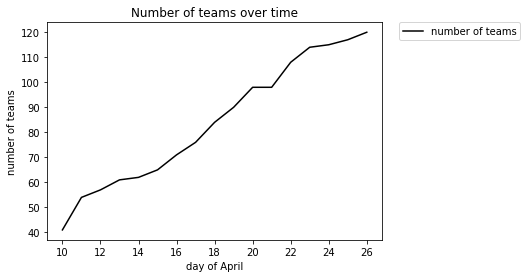

In [5]:
plt.plot(DAYS, teams, color='black', label="number of teams")
plot(plt, ylabel="number of teams", title="Number of teams over time")

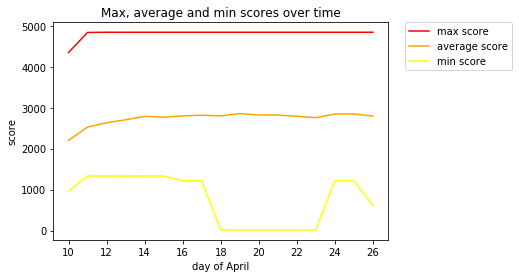

In [6]:
plt.plot(DAYS, maxs, color='red', label="max score")
plt.plot(DAYS, avgs, color='orange', label="average score")
plt.plot(DAYS, mins, color='yellow', label="min score")
plot(plt, ylabel="score", title="Max, average and min scores over time")

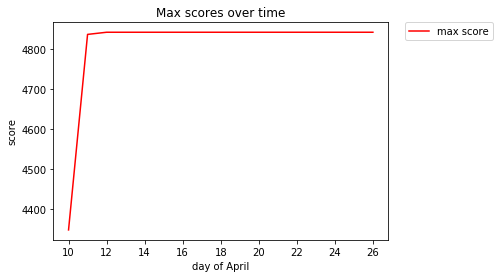

In [7]:
plt.plot(DAYS, maxs, color='red', label="max score")
plot(plt, ylabel="score", title="Max scores over time")

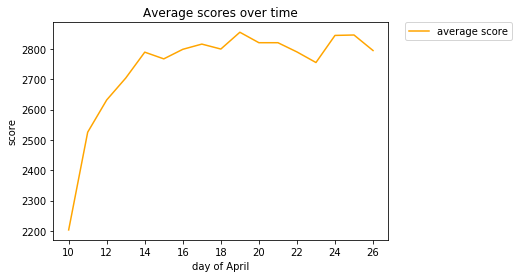

In [8]:
plt.plot(DAYS, avgs, color='orange', label="average score")
plot(plt, ylabel="score", title="Average scores over time")

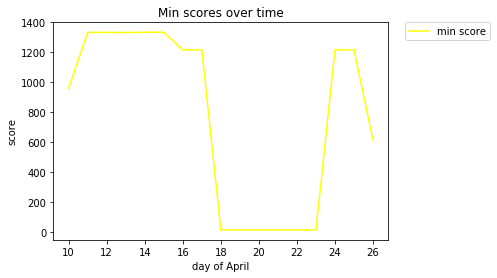

In [9]:
plt.plot(DAYS, mins, color='yellow', label="min score")
plot(plt, ylabel="score", title="Min scores over time")